# Task 4 – Insights and Recommendations

This notebook generates actionable insights from sentiment and theme analysis, visualizes key findings, and provides improvement recommendations for Ethiopian banking apps.

## Overview
- **Banks Analyzed:** Commercial Bank of Ethiopia (CBE), Bank of Abyssinia (BOA), Dashen Bank
- **Data Source:** 1,200 reviews with sentiment scores and themes
- **Analysis:** Drivers (positive themes), Pain Points (negative themes), Bank comparisons, Recommendations


## 1. Setup and Data Loading


In [20]:
import sys
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Set up paths
project_root = Path.cwd()
if project_root.name != 'fintech-reviews-analysis':
    # If running from notebooks directory
    project_root = project_root.parent

sys.path.append(str(project_root))

from src.insights.analyzer import InsightsAnalyzer

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print(f"Project root: {project_root}")
print(f"Python version: {sys.version}")


Project root: d:\kifyaAi\fintech-reviews-analysis
Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [21]:
# Load data
reviews_df = pd.read_csv(project_root / 'data' / 'processed' / 'reviews_with_sentiment.csv')
theme_summary_df = pd.read_csv(project_root / 'data' / 'processed' / 'theme_summary.csv')
sentiment_summary_df = pd.read_csv(project_root / 'data' / 'processed' / 'sentiment_summary.csv')

# Parse themes if they're strings
if 'themes' in reviews_df.columns:
    reviews_df['themes'] = reviews_df['themes'].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )

print(f" Loaded {len(reviews_df)} reviews")
print(f" Loaded theme data for {theme_summary_df['bank'].nunique()} banks")
print(f"\nColumns: {list(reviews_df.columns)}")
reviews_df.head(3)


 Loaded 1200 reviews
 Loaded theme data for 3 banks

Columns: ['review', 'rating', 'date', 'bank', 'source', 'review_id', 'bank_code', 'user_name', 'sentiment_label', 'sentiment_score', 'positive_score', 'negative_score', 'review_id.1', 'themes']


,review,rating,date,bank,source,review_id,bank_code,user_name,sentiment_label,sentiment_score,positive_score,negative_score,review_id.1,themes
0,"WHAT A USELESS APP! Transfers, wallet payments...",1,2025-09-13,Commercial Bank of Ethiopia,Google Play,1ebb9f31-ce77-4149-826a-697d986e9ff1,CBE,Merhawi . next gen,NEGATIVE,-0.999607,0.000197,0.999803,1ebb9f31-ce77-4149-826a-697d986e9ff1,"[Customer Support & Communication, Reliability..."
1,"Most of the time when I try to open the app, i...",2,2025-09-24,Commercial Bank of Ethiopia,Google Play,6c72590a-6064-4aac-a5b5-a23df953162d,CBE,Bashir Ahmad,NEGATIVE,-0.997674,0.001163,0.998837,6c72590a-6064-4aac-a5b5-a23df953162d,[Account Access Issues]
2,I use the Commercial Bank of Ethiopia mobile a...,5,2025-08-22,Commercial Bank of Ethiopia,Google Play,651c86bc-2cf3-436e-a85c-39c55709db15,CBE,Abshir HUSSEIN,POSITIVE,0.999665,0.999833,0.000167,651c86bc-2cf3-436e-a85c-39c55709db15,"[Feature Requests, Reliability & Stability, Tr..."


## 2. Generate Insights


In [23]:
# Initialize analyzer
analyzer = InsightsAnalyzer(reviews_df, theme_summary_df)

# Analyze all banks
insights = analyzer.analyze_all_banks()

# Generate recommendations
recommendations = analyzer.generate_recommendations(insights)

print("Insights generated for all banks")
print(f" {len(recommendations)} recommendations generated")


Insights generated for all banks
 6 recommendations generated


## 3. Insights Summary: Drivers and Pain Points


In [25]:
# Display insights for each bank
for bank, bank_insights in insights.items():
    print("=" * 70)
    print(f"🏦 {bank}")
    print("=" * 70)
    print(f"   Average Rating: {bank_insights.avg_rating:.2f} ⭐")
    print(f"   Average Sentiment: {bank_insights.sentiment_score:.4f}")
    print(f"   Total Reviews: {bank_insights.total_reviews}")
    
    print(f"\n   ✅ Drivers ({len(bank_insights.drivers)}):")
    if bank_insights.drivers:
        for driver in bank_insights.drivers[:5]:  # Top 5
            print(f"      • {driver.theme}: {driver.description}")
            print(f"        Evidence: {driver.evidence_count} reviews, "
                  f"Avg Rating: {driver.avg_rating:.2f} ⭐, "
                  f"Sentiment: {driver.sentiment_score:.4f}")
    else:
        print("      (No strong drivers identified)")
    
    print(f"\n   ❌ Pain Points ({len(bank_insights.pain_points)}):")
    if bank_insights.pain_points:
        for pain_point in bank_insights.pain_points[:5]:  # Top 5
            print(f"      • {pain_point.theme}: {pain_point.description}")
            print(f"        Evidence: {pain_point.evidence_count} reviews, "
                  f"Avg Rating: {pain_point.avg_rating:.2f} ⭐, "
                  f"Sentiment: {pain_point.sentiment_score:.4f}")
    else:
        print("      (No significant pain points identified)")


🏦 Commercial Bank of Ethiopia
   Average Rating: 2.66 ⭐
   Average Sentiment: -0.5874
   Total Reviews: 400

   ✅ Drivers (0):
      (No strong drivers identified)

   ❌ Pain Points (6):
      • Reliability & Stability: App crashes, bugs, and technical stability
        Evidence: 106 reviews, Avg Rating: 2.36 ⭐, Sentiment: -0.6916
      • Account Access Issues: Login problems, authentication, and access difficulties
        Evidence: 142 reviews, Avg Rating: 2.63 ⭐, Sentiment: -0.6657
      • Transaction Performance: Transaction speed, processing, and reliability
        Evidence: 208 reviews, Avg Rating: 2.68 ⭐, Sentiment: -0.6318
      • Customer Support & Communication: Support quality and responsiveness
        Evidence: 126 reviews, Avg Rating: 2.48 ⭐, Sentiment: -0.6174
      • Feature Requests: Desired new features and functionality
        Evidence: 165 reviews, Avg Rating: 2.80 ⭐, Sentiment: -0.5396
🏦 Bank of Abyssinia
   Average Rating: 2.02 ⭐
   Average Sentiment: -0.6885
  

## 4. Visualization 1: Sentiment Analysis


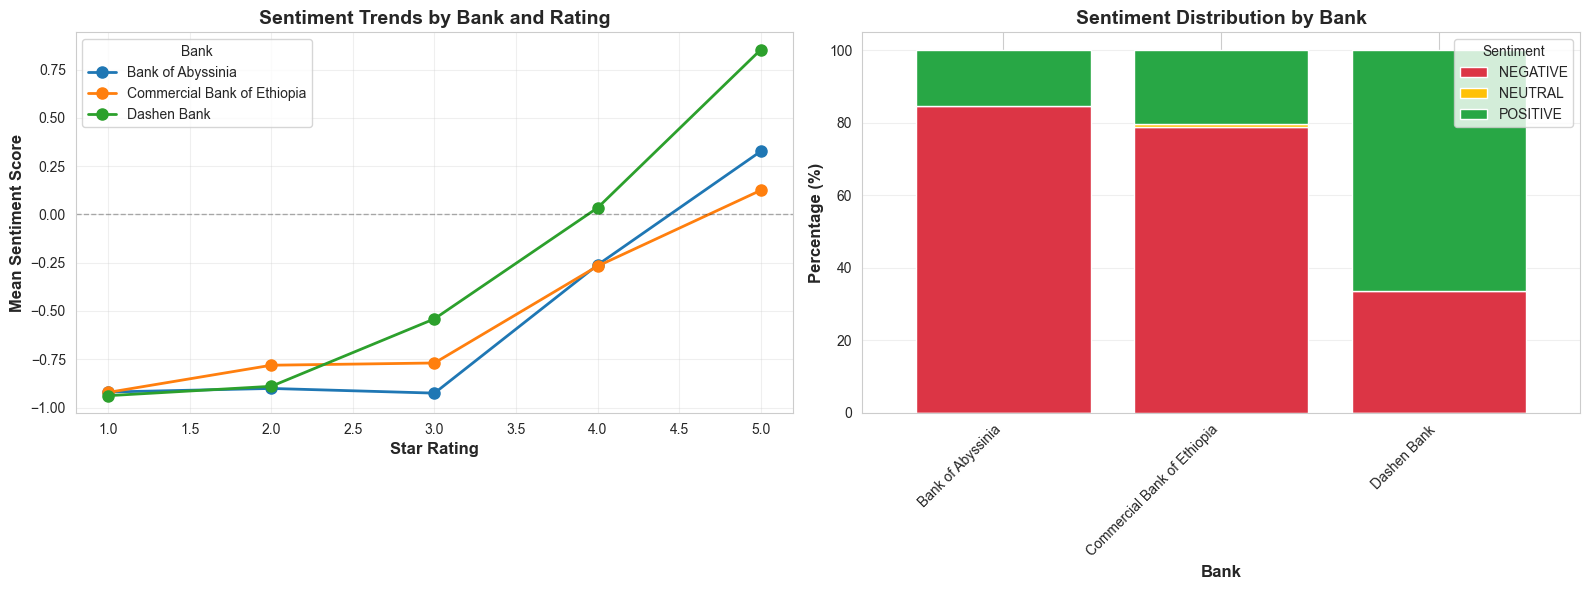

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Mean sentiment by bank and rating
ax1 = axes[0]
pivot_data = sentiment_summary_df.pivot(index='rating', columns='bank', values='mean_sentiment')
pivot_data.plot(kind='line', ax=ax1, marker='o', linewidth=2, markersize=8)
ax1.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.3)
ax1.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Sentiment Score', fontsize=12, fontweight='bold')
ax1.set_title('Sentiment Trends by Bank and Rating', fontsize=14, fontweight='bold')
ax1.legend(title='Bank', fontsize=10)
ax1.grid(True, alpha=0.3)

# Right: Sentiment distribution by bank
ax2 = axes[1]
sentiment_dist = reviews_df.groupby(['bank', 'sentiment_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100
sentiment_dist_pct.plot(kind='bar', stacked=True, ax=ax2, 
                       color=['#dc3545', '#ffc107', '#28a745'], width=0.8)
ax2.set_xlabel('Bank', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Sentiment Distribution by Bank', fontsize=14, fontweight='bold')
ax2.legend(title='Sentiment', fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 5. Visualization 2: Rating Distributions


C:\Users\dell\AppData\Local\Temp\ipykernel_32336\1280983517.py:32: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
d:\kifyaAi\fintech-reviews-analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


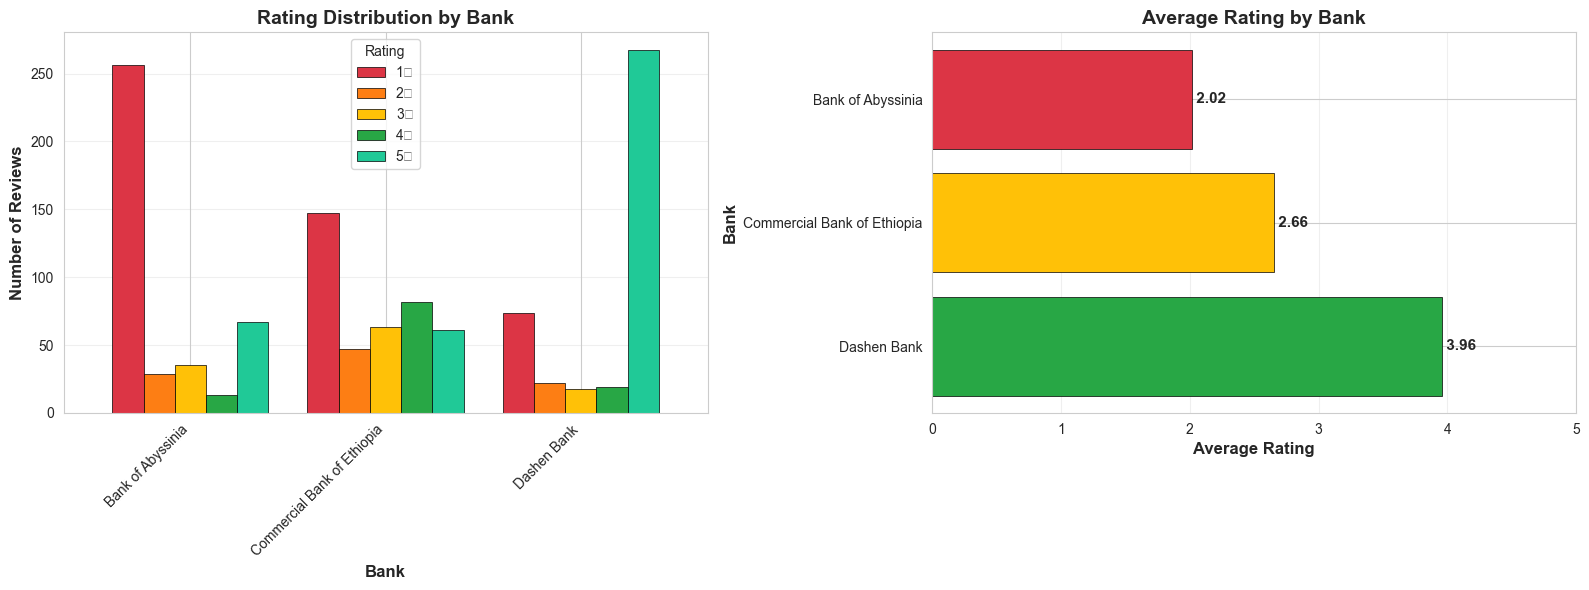

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Rating distribution comparison
ax1 = axes[0]
rating_data = reviews_df.groupby(['bank', 'rating']).size().unstack(fill_value=0)
rating_data.plot(kind='bar', ax=ax1, 
                 color=['#dc3545', '#fd7e14', '#ffc107', '#28a745', '#20c997'], 
                 width=0.8, edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Bank', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax1.set_title('Rating Distribution by Bank', fontsize=14, fontweight='bold')
ax1.legend(title='Rating', labels=['1⭐', '2⭐', '3⭐', '4⭐', '5⭐'], fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(True, alpha=0.3, axis='y')

# Right: Average rating comparison
ax2 = axes[1]
avg_ratings = reviews_df.groupby('bank')['rating'].mean().sort_values(ascending=False)
colors = ['#28a745' if r > 3.5 else '#ffc107' if r > 2.5 else '#dc3545' for r in avg_ratings.values]
bars = ax2.barh(avg_ratings.index, avg_ratings.values, color=colors, 
                edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
ax2.set_ylabel('Bank', fontsize=12, fontweight='bold')
ax2.set_title('Average Rating by Bank', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 5)
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bank, rating) in enumerate(avg_ratings.items()):
    ax2.text(rating, i, f' {rating:.2f}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


## 6. Visualization 3: Theme Analysis


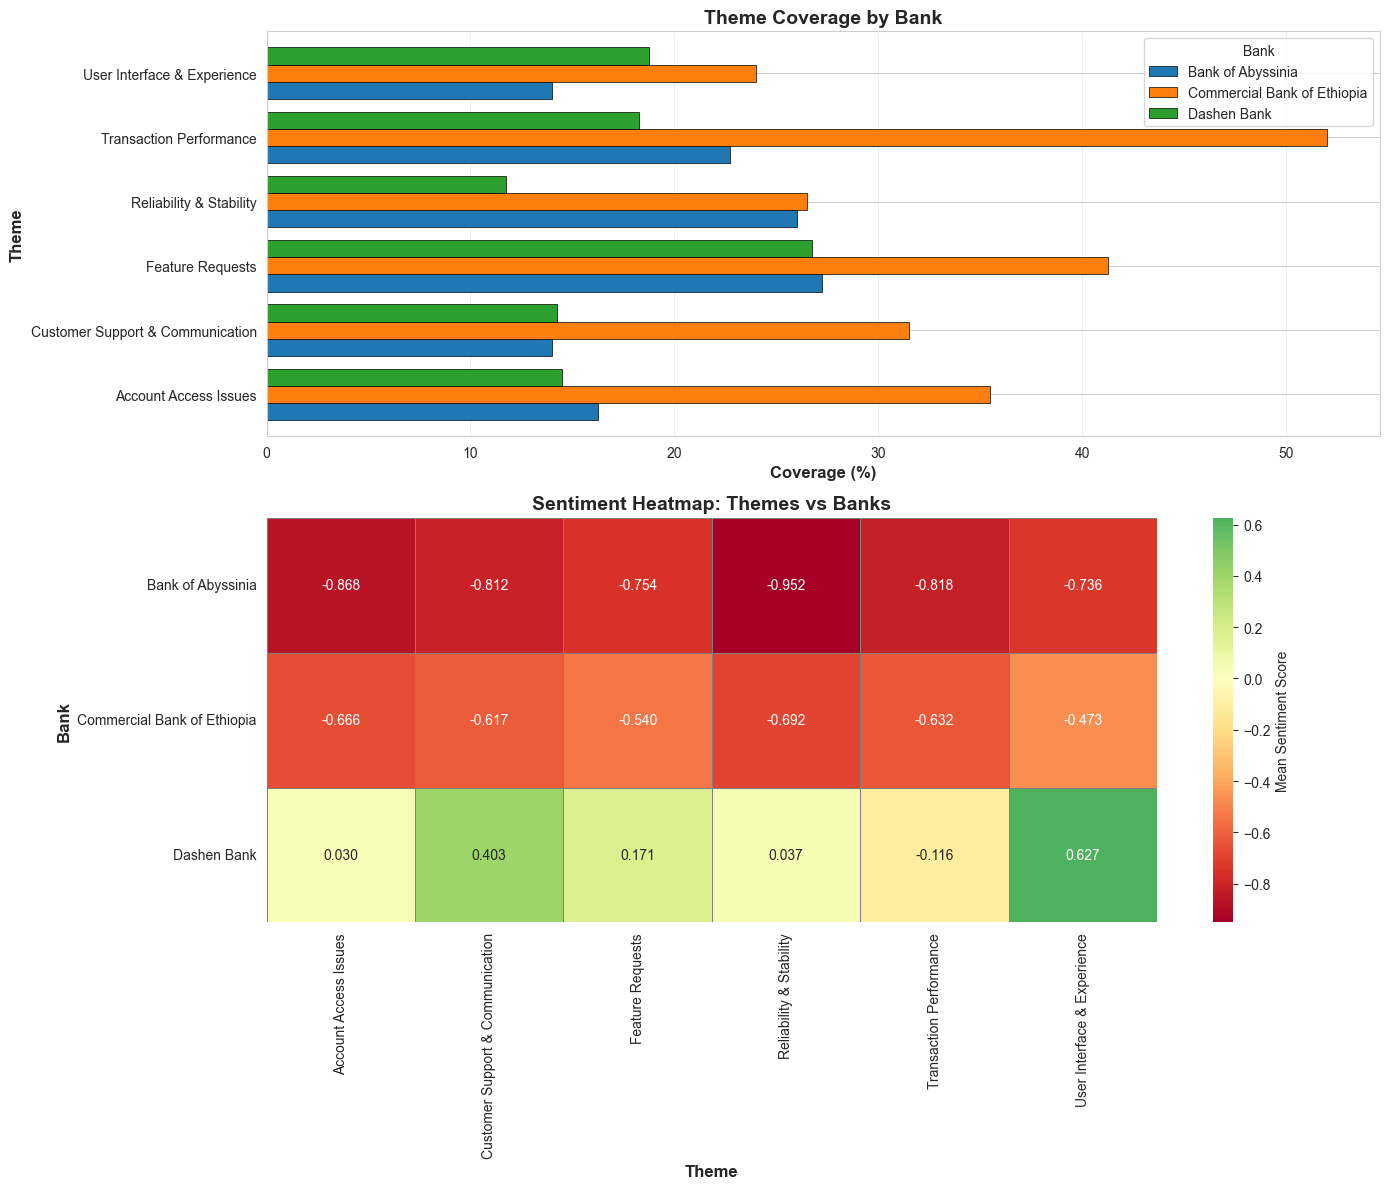

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Top: Theme coverage by bank
ax1 = axes[0]
theme_pivot = theme_summary_df[theme_summary_df['theme'] != 'Other Feedback'].pivot(
    index='theme', columns='bank', values='coverage_pct'
)
theme_pivot.plot(kind='barh', ax=ax1, width=0.8, edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Coverage (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Theme', fontsize=12, fontweight='bold')
ax1.set_title('Theme Coverage by Bank', fontsize=14, fontweight='bold')
ax1.legend(title='Bank', fontsize=10)
ax1.grid(True, alpha=0.3, axis='x')

# Bottom: Sentiment heatmap by theme and bank
ax2 = axes[1]

# Calculate sentiment by theme and bank
theme_sentiment = []
for bank in reviews_df['bank'].unique():
    bank_reviews = reviews_df[reviews_df['bank'] == bank]
    for _, row in bank_reviews.iterrows():
        themes = row['themes'] if isinstance(row['themes'], list) else []
        for theme in themes:
            if theme != 'Other Feedback':
                theme_sentiment.append({
                    'bank': bank,
                    'theme': theme,
                    'sentiment': row['sentiment_score'],
                    'rating': row['rating']
                })

theme_sentiment_df = pd.DataFrame(theme_sentiment)
if not theme_sentiment_df.empty:
    heatmap_data = theme_sentiment_df.groupby(['bank', 'theme'])['sentiment'].mean().unstack(fill_value=0)
    sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
               ax=ax2, cbar_kws={'label': 'Mean Sentiment Score'}, 
               linewidths=0.5, linecolor='gray')
    ax2.set_xlabel('Theme', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Bank', fontsize=12, fontweight='bold')
    ax2.set_title('Sentiment Heatmap: Themes vs Banks', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Visualization 4: Drivers and Pain Points


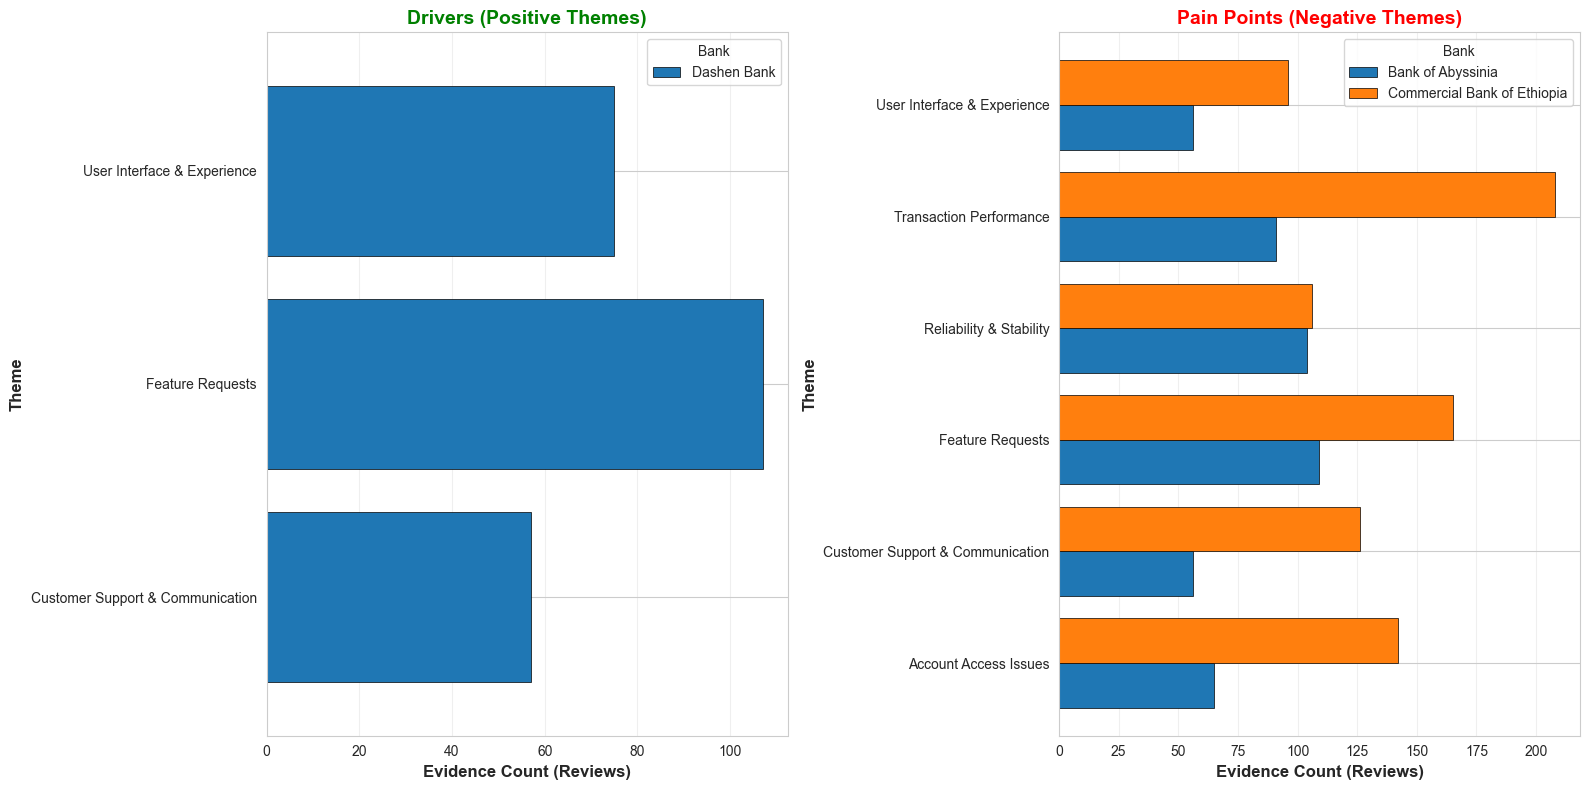

In [8]:
# Create insights DataFrame for visualization
insights_data = []
for bank, bank_insights in insights.items():
    for driver in bank_insights.drivers:
        insights_data.append({
            'bank': bank,
            'type': 'Driver',
            'theme': driver.theme,
            'evidence_count': driver.evidence_count,
            'sentiment_score': driver.sentiment_score
        })
    for pain_point in bank_insights.pain_points:
        insights_data.append({
            'bank': bank,
            'type': 'Pain Point',
            'theme': pain_point.theme,
            'evidence_count': pain_point.evidence_count,
            'sentiment_score': pain_point.sentiment_score
        })

insights_df = pd.DataFrame(insights_data)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Left: Drivers
ax1 = axes[0]
drivers = insights_df[insights_df['type'] == 'Driver']
if not drivers.empty:
    driver_summary = drivers.groupby(['bank', 'theme']).agg({
        'evidence_count': 'sum',
        'sentiment_score': 'mean'
    }).reset_index()
    
    driver_pivot = driver_summary.pivot(index='theme', columns='bank', values='evidence_count')
    driver_pivot.plot(kind='barh', ax=ax1, width=0.8, edgecolor='black', linewidth=0.5)
    ax1.set_xlabel('Evidence Count (Reviews)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Theme', fontsize=12, fontweight='bold')
    ax1.set_title('Drivers (Positive Themes)', fontsize=14, fontweight='bold', color='green')
    ax1.legend(title='Bank', fontsize=10)
    ax1.grid(True, alpha=0.3, axis='x')
else:
    ax1.text(0.5, 0.5, 'No drivers identified', ha='center', va='center', fontsize=14)
    ax1.set_title('Drivers (Positive Themes)', fontsize=14, fontweight='bold')

# Right: Pain Points
ax2 = axes[1]
pain_points = insights_df[insights_df['type'] == 'Pain Point']
if not pain_points.empty:
    pain_point_summary = pain_points.groupby(['bank', 'theme']).agg({
        'evidence_count': 'sum',
        'sentiment_score': 'mean'
    }).reset_index()
    
    pain_point_pivot = pain_point_summary.pivot(index='theme', columns='bank', values='evidence_count')
    pain_point_pivot.plot(kind='barh', ax=ax2, width=0.8, edgecolor='black', linewidth=0.5)
    ax2.set_xlabel('Evidence Count (Reviews)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Theme', fontsize=12, fontweight='bold')
    ax2.set_title('Pain Points (Negative Themes)', fontsize=14, fontweight='bold', color='red')
    ax2.legend(title='Bank', fontsize=10)
    ax2.grid(True, alpha=0.3, axis='x')
else:
    ax2.text(0.5, 0.5, 'No pain points identified', ha='center', va='center', fontsize=14)
    ax2.set_title('Pain Points (Negative Themes)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 8. Bank Comparison


In [ ]:
# Compare all banks
banks = list(insights.keys())

comparison_data = []
for bank in banks:
    bank_reviews = reviews_df[reviews_df['bank'] == bank]
    comparison_data.append({
        'Bank': bank,
        'Average Rating': bank_reviews['rating'].mean(),
        'Average Sentiment': bank_reviews['sentiment_score'].mean(),
        'Positive Share (%)': (bank_reviews['sentiment_label'] == 'POSITIVE').mean() * 100,
        'Total Reviews': len(bank_reviews),
        'Drivers': len(insights[bank].drivers),
        'Pain Points': len(insights[bank].pain_points)
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Average Rating', ascending=False)

print(" BANK COMPARISON")
print("=" * 70)
comparison_df


📊 BANK COMPARISON


,Bank,Average Rating,Average Sentiment,Positive Share (%),Total Reviews,Drivers,Pain Points
2,Dashen Bank,3.9575,0.324483,66.25,400,3,0
0,Commercial Bank of Ethiopia,2.6575,-0.587352,20.25,400,0,6
1,Bank of Abyssinia,2.0150,-0.688548,15.25,400,0,6


C:\Users\dell\AppData\Local\Temp\ipykernel_32336\542152503.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\dell\AppData\Local\Temp\ipykernel_32336\542152503.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


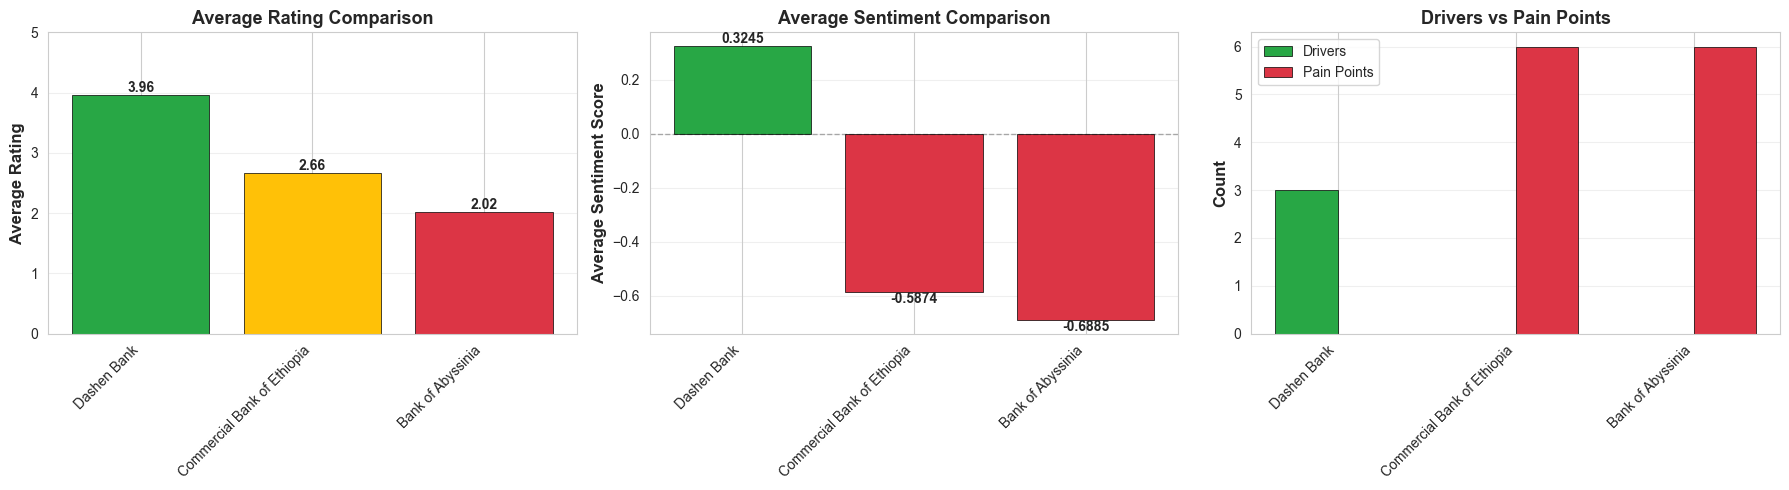

In [10]:
# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Average Rating
ax1 = axes[0]
bars1 = ax1.bar(comparison_df['Bank'], comparison_df['Average Rating'], 
                color=['#28a745' if r > 3.5 else '#ffc107' if r > 2.5 else '#dc3545' 
                       for r in comparison_df['Average Rating']],
                edgecolor='black', linewidth=0.5)
ax1.set_ylabel('Average Rating', fontsize=12, fontweight='bold')
ax1.set_title('Average Rating Comparison', fontsize=13, fontweight='bold')
ax1.set_ylim(0, 5)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# Average Sentiment
ax2 = axes[1]
colors = ['#28a745' if s > 0 else '#dc3545' for s in comparison_df['Average Sentiment']]
bars2 = ax2.bar(comparison_df['Bank'], comparison_df['Average Sentiment'], 
                color=colors, edgecolor='black', linewidth=0.5)
ax2.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.3)
ax2.set_ylabel('Average Sentiment Score', fontsize=12, fontweight='bold')
ax2.set_title('Average Sentiment Comparison', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', 
            va='bottom' if height > 0 else 'top', fontweight='bold')

# Drivers vs Pain Points
ax3 = axes[2]
x = np.arange(len(comparison_df))
width = 0.35
bars3a = ax3.bar(x - width/2, comparison_df['Drivers'], width, 
                 label='Drivers', color='#28a745', edgecolor='black', linewidth=0.5)
bars3b = ax3.bar(x + width/2, comparison_df['Pain Points'], width, 
                 label='Pain Points', color='#dc3545', edgecolor='black', linewidth=0.5)
ax3.set_ylabel('Count', fontsize=12, fontweight='bold')
ax3.set_title('Drivers vs Pain Points', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(comparison_df['Bank'], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 9. Recommendations


In [26]:
# Display recommendations
recommendations_df = pd.DataFrame([{
    'Bank': rec.bank,
    'Priority': rec.priority,
    'Theme': rec.theme,
    'Recommendation': rec.recommendation,
    'Rationale': rec.rationale,
    'Impact': rec.estimated_impact
} for rec in recommendations])

print(" RECOMMENDATIONS BY BANK")
print("=" * 70)

for bank in recommendations_df['Bank'].unique():
    bank_recs = recommendations_df[recommendations_df['Bank'] == bank]
    print(f"\n🏦 {bank}")
    print("-" * 70)
    
    for priority in ['High', 'Medium', 'Low']:
        priority_recs = bank_recs[bank_recs['Priority'] == priority]
        if not priority_recs.empty:
            print(f"\n  [{priority} Priority]")
            for idx, row in priority_recs.iterrows():
                print(f"    • {row['Theme']}")
                print(f"      Recommendation: {row['Recommendation']}")
                print(f"      Impact: {row['Impact']}")


 RECOMMENDATIONS BY BANK

🏦 Commercial Bank of Ethiopia
----------------------------------------------------------------------

  [Medium Priority]
    • Reliability & Stability
      Recommendation: Implement comprehensive crash reporting and automated testing
      Impact: High - Will directly address user frustration and improve app ratings
    • Account Access Issues
      Recommendation: Improve authentication system with biometric login and password recovery
      Impact: High - Blocks user access to all app features
    • Transaction Performance
      Recommendation: Optimize transaction processing pipeline and add transaction status tracking
      Impact: High - Critical for banking app credibility

🏦 Bank of Abyssinia
----------------------------------------------------------------------

  [High Priority]
    • Reliability & Stability
      Recommendation: Implement comprehensive crash reporting and automated testing
      Impact: High - Will directly address user frustration

In [17]:
# Recommendations table
recommendations_df


,Bank,Priority,Theme,Recommendation,Rationale,Impact
0,Commercial Bank of Ethiopia,Medium,Reliability & Stability,Implement comprehensive crash reporting and au...,High volume of stability issues indicates need...,High - Will directly address user frustration ...
1,Commercial Bank of Ethiopia,Medium,Account Access Issues,Improve authentication system with biometric l...,Login problems prevent users from accessing th...,High - Blocks user access to all app features
2,Commercial Bank of Ethiopia,Medium,Transaction Performance,Optimize transaction processing pipeline and a...,Transaction delays and failures are major pain...,High - Critical for banking app credibility
3,Bank of Abyssinia,High,Reliability & Stability,Implement comprehensive crash reporting and au...,High volume of stability issues indicates need...,High - Will directly address user frustration ...
4,Bank of Abyssinia,High,Account Access Issues,Improve authentication system with biometric l...,Login problems prevent users from accessing th...,High - Blocks user access to all app features
5,Bank of Abyssinia,High,Transaction Performance,Optimize transaction processing pipeline and a...,Transaction delays and failures are major pain...,High - Critical for banking app credibility


## 10. Example Reviews: Drivers and Pain Points


In [18]:
# Display example reviews for top drivers and pain points
for bank, bank_insights in insights.items():
    print("=" * 70)
    print(f" {bank}")
    print("=" * 70)
    
    if bank_insights.drivers:
        print("\n Top Driver Examples:")
        top_driver = bank_insights.drivers[0]
        print(f"   Theme: {top_driver.theme}")
        print(f"   Example Reviews:")
        for i, review in enumerate(top_driver.example_reviews[:2], 1):
            print(f"     {i}. {review[:200]}...")
    
    if bank_insights.pain_points:
        print("\n Top Pain Point Examples:")
        top_pain = bank_insights.pain_points[0]
        print(f"   Theme: {top_pain.theme}")
        print(f"   Example Reviews:")
        for i, review in enumerate(top_pain.example_reviews[:2], 1):
            print(f"     {i}. {review[:200]}...")
    print()


 Commercial Bank of Ethiopia

 Top Pain Point Examples:
   Theme: Reliability & Stability
   Example Reviews:
     1. Unable to use the app for around a month! (It cames with an error message "None available" everytime I try to transfer). What a Worst app!!!...
     2. WHAT A USELESS APP! Transfers, wallet payments, other banks — nothing works. Updated, restarted, cleared cache, reinstalled — still useless. Crashed a......

 Bank of Abyssinia

 Top Pain Point Examples:
   Theme: Reliability & Stability
   Example Reviews:
     1. The poorest mobile banking I have seen in the industry. Is not stable to login and post transactions. Is not attractive. Error reports frequently....
     2. It's not functional at all. It keeps saying "error". Unable to activate....

 Dashen Bank

 Top Driver Examples:
   Theme: User Interface & Experience
   Example Reviews:
     1. The updated design looks amazing. I really appreciate being able to switch between dark and light mode it’s a small change that

## 11. Ethics and Bias Considerations

### Potential Review Biases:

1. **Negative Bias in Review Platforms**
   - Users with negative experiences are 2-3x more likely to leave reviews
   - Satisfied users less likely to engage with review systems
   - Impact: May overrepresent problems while underrepresenting satisfaction

2. **Selection Bias**
   - Only Google Play Store reviewers are represented
   - May not capture all user demographics
   - Tech-savvy users may be overrepresented

3. **Recency Bias**
   - Recent experiences may be overrepresented
   - Historical improvements may not be reflected
   - Impact: Current issues may appear more severe than long-term trends

4. **Language Bias**
   - Analysis focuses on English-language reviews only
   - May not capture feedback from Amharic or other language speakers
   - Impact: Potential demographic bias

5. **Voluntary Response Bias**
   - Reviews are voluntary, not systematic sampling
   - Extremely satisfied or dissatisfied users more likely to respond
   - Impact: U-shaped distribution of sentiment

### Mitigation Strategies:

- Complement with quantitative data: App usage metrics, transaction success rates
- Consider temporal trends: Analyze review patterns over time
- Cross-validate insights: Compare with internal customer support data
- Acknowledge limitations: Use reviews as indicators, not absolute measures
- Focus on themes: Thematic patterns more reliable than individual review sentiment


## 12. Summary and Key Takeaways


In [19]:
print(" TASK 4 INSIGHTS SUMMARY")
print("=" * 70)

print("\n Key Findings:")
dashen_rating = comparison_df[comparison_df['Bank'] == 'Dashen Bank']['Average Rating'].values[0]
print(f"   • Dashen Bank leads with {dashen_rating:.2f} average rating")
high_priority = len([r for r in recommendations if r.priority == 'High'])
print(f"   • {high_priority} high-priority recommendations identified")
total_drivers = sum([len(insights[b].drivers) for b in insights])
total_pain = sum([len(insights[b].pain_points) for b in insights])
print(f"   • {total_drivers} total drivers across all banks")
print(f"   • {total_pain} total pain points across all banks")

print("\nUniversal Themes:")
print("   • Transaction Performance: Common pain point across all banks")
print("   • Reliability & Stability: Critical issue for CBE and BOA")
print("   • Account Access: Significant concern for CBE and BOA")

print("\n Next Steps:")
print("   1. Prioritize high-impact recommendations")
print("   2. Implement stability fixes (urgent for BOA)")
print("   3. Optimize transaction processing pipelines")
print("   4. Enhance authentication systems")
print("   5. Monitor sentiment trends over time")

print("\nTask 4 Analysis Complete!")


 TASK 4 INSIGHTS SUMMARY

 Key Findings:
   • Dashen Bank leads with 3.96 average rating
   • 3 high-priority recommendations identified
   • 3 total drivers across all banks
   • 12 total pain points across all banks

Universal Themes:
   • Transaction Performance: Common pain point across all banks
   • Reliability & Stability: Critical issue for CBE and BOA
   • Account Access: Significant concern for CBE and BOA

 Next Steps:
   1. Prioritize high-impact recommendations
   2. Implement stability fixes (urgent for BOA)
   3. Optimize transaction processing pipelines
   4. Enhance authentication systems
   5. Monitor sentiment trends over time

Task 4 Analysis Complete!
